<a href="https://colab.research.google.com/github/ankushKun/learning-ML/blob/master/Image_classification_WIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification
using MNIST handwritten digits database

In [2]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [3]:
dataset = MNIST(root="data/",download=True) # will download dataset in it doesnot exist

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [4]:
len(dataset)

60000

test dataset

In [5]:
test_dataset = MNIST(root="data/",train=False)

In [6]:
len(test_dataset)

10000

In [7]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F49FE3217B8>, 5)

use matplotlib to view images

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
#tells colab to show graphs in notebook and not as popups

label : 5


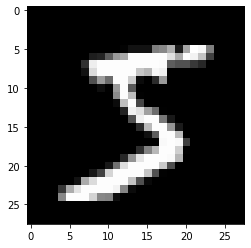

In [11]:
img,label = dataset[0]
plt.imshow(img,cmap="gray")
print("label : "+str(label))

now we need to convert these images to tensors

In [12]:
import torchvision.transforms as transforms

take training dataset and transform it to tensor using  **transforms.ToTensor()**

In [14]:
dataset = MNIST(root="data/",train=True,transform=transforms.ToTensor())

In [20]:
img_tensor, label = dataset[0]
print(img_tensor.shape,label)
print(img_tensor) #28 lists of 28 items, 1 - white, 0 - black

torch.Size([1, 28, 28]) 5
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.000

we can also plot the tensor

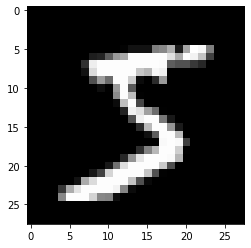

In [24]:
plt.imshow(img_tensor[0],cmap="gray")

### Training and validation datasets
1. training dataset - used to traing the model
2. validation set - used to evaluate model during training, adjust hyperparameters(learning rate...)
3. test set - used to compare different models, or different modeling approaches and report the final accurach of the model

we will manual split the MNIST dataset into training and validation sets

In [25]:
import numpy as np

this randomly splits dataset of 60000 images into training and validation sets containing random images from 0-9

In [38]:
# function to split the validation set randomly
def split_validation(n,val_percent):
  n_val = int(val_percent*n)
  indexes = np.random.permutation(n) # proper shuffling important
  return indexes[n_val:],indexes[:n_val]

In [55]:
dataset = MNIST(root="data/",train=True,transform=transforms.ToTensor())
n = len(dataset)
val_percent = 0.2 #split by 20 percent
train_set, valid_set = split_validation(n,val_percent)

In [37]:
print(len(train_set),len(valid_set))

48000 12000


time to load data in batches using DataLoader

In [39]:
from torch.utils.data.dataloader import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

In [62]:
batch_size = 100

# Training sampler and loader
train_sampler = SubsetRandomSampler(train_set)
train_loader = DataLoader(dataset,batch_size,sampler=train_sampler)

# Validation sampler and loader
val_sampler = SubsetRandomSampler(valid_set)
val_loader = DataLoader(dataset,batch_size,sampler=val_sampler)

### Logistic regression model
almost similar to linear regression\
output is input @ weight.t() + bias\
we use **nn.Linear**\
we need to flatten each 1x28x28 image into 28x28 vectors before passing to the model\
output of each element is a vector of size 10, each element having the probability of which digit(0-9) it might be, the number is just the element with highest probability

In [41]:
import torch.nn as nn

In [59]:
input_size = 28*28 #size input
num_classes = 10   #size output

model = nn.Linear(input_size,num_classes)

In [43]:
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.0277, -0.0313, -0.0116,  ..., -0.0317, -0.0319,  0.0294],
        [ 0.0267, -0.0011, -0.0195,  ..., -0.0075, -0.0188,  0.0327],
        [ 0.0017, -0.0298,  0.0193,  ...,  0.0210, -0.0185,  0.0083],
        ...,
        [ 0.0268,  0.0109,  0.0083,  ...,  0.0006, -0.0013, -0.0217],
        [-0.0326,  0.0219, -0.0162,  ..., -0.0150, -0.0077, -0.0106],
        [ 0.0118, -0.0137,  0.0317,  ..., -0.0067,  0.0231,  0.0346]],
       requires_grad=True), Parameter containing:
tensor([-0.0304, -0.0316,  0.0115, -0.0009,  0.0053,  0.0266, -0.0327, -0.0352,
        -0.0197, -0.0291], requires_grad=True)]


In [63]:
for images,labels in train_loader:
  print(labels,images.shape)
  #output = model(images) #it will need (100,784) vector, but we passes (100,1,28,28)
  break
output

tensor([4, 6, 3, 4, 0, 1, 1, 5, 2, 4, 5, 8, 6, 0, 2, 2, 7, 5, 1, 9, 9, 4, 9, 1,
        4, 0, 0, 1, 5, 2, 8, 9, 2, 0, 8, 7, 0, 3, 0, 8, 0, 7, 5, 0, 1, 8, 6, 4,
        1, 4, 1, 0, 4, 4, 7, 1, 3, 2, 4, 3, 1, 8, 3, 4, 9, 8, 0, 1, 4, 2, 7, 6,
        6, 2, 1, 1, 7, 9, 7, 0, 4, 6, 0, 9, 6, 7, 5, 3, 7, 2, 4, 9, 7, 5, 2, 2,
        3, 3, 9, 1]) torch.Size([100, 1, 28, 28])


RuntimeError: ignored

need to create a custom class inheriting **nn.Module** and flatten out the input using **.reshape**

In [64]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size,num_classes)

  def forward(self,xb):
    xb = xb.reshape(-1,28*28)
    # -1 coz pytorch will automatically calc what dimension it will be
    # -1 is the batch size
    out = self.linear(xb)
    return out

model = MnistModel()

In [66]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0245,  0.0257, -0.0146,  ...,  0.0341,  0.0172,  0.0271],
         [ 0.0175, -0.0261, -0.0312,  ...,  0.0221, -0.0128, -0.0290],
         [ 0.0012, -0.0006,  0.0205,  ...,  0.0233,  0.0253,  0.0003],
         ...,
         [ 0.0187, -0.0137, -0.0119,  ...,  0.0185,  0.0145, -0.0348],
         [ 0.0057, -0.0116, -0.0296,  ..., -0.0247,  0.0085, -0.0033],
         [-0.0155,  0.0216, -0.0037,  ...,  0.0334, -0.0056, -0.0341]],
        requires_grad=True), Parameter containing:
 tensor([-0.0182, -0.0027, -0.0234,  0.0120,  0.0018, -0.0129, -0.0293,  0.0185,
          0.0261,  0.0006], requires_grad=True)]

In [70]:
for images,labels in train_loader:
  output = model(images) 
  break
output.shape,output.data[:5]

(torch.Size([100, 10]),
 tensor([[ 0.2787, -0.1546, -0.3682, -0.1306,  0.1129, -0.0602, -0.0705, -0.0052,
          -0.0481,  0.2290],
         [ 0.2968, -0.1104, -0.2144,  0.0304, -0.0952, -0.0495,  0.2093, -0.1750,
          -0.0069,  0.2608],
         [ 0.2997,  0.0970, -0.1346,  0.1101,  0.2790, -0.0371,  0.0625, -0.1858,
          -0.1191,  0.1188],
         [ 0.1953, -0.0764, -0.0873,  0.0256, -0.0854, -0.0142,  0.2173, -0.1268,
          -0.0459,  0.2023],
         [ 0.3758,  0.0111, -0.0634,  0.0148,  0.1331, -0.3744, -0.0468, -0.0715,
          -0.0219,  0.0533]]))

convert output into probability using softmax function\
`S(yi) = e^yi / Summation(e^yi,i)`

In [71]:
import torch.nn.functional as F

In [78]:
probabilities = F.softmax(output,dim=1)
probabilities.data[0],torch.sum(probabilities.data[0])

(tensor([0.1329, 0.0861, 0.0696, 0.0882, 0.1126, 0.0947, 0.0937, 0.1000, 0.0958,
         0.1264]), tensor(1.))

In [86]:
# get highest probability element
max_probs, preds = torch.max(probabilities,dim=1)
max_probs, preds,labels # preds vs labels XD
# not perfect coz random ws and bs

(tensor([0.1329, 0.1306, 0.1269, 0.1208, 0.1432, 0.1254, 0.1356, 0.1355, 0.1532,
         0.1182, 0.1323, 0.1637, 0.1246, 0.1304, 0.1461, 0.1203, 0.1356, 0.1434,
         0.1178, 0.1346, 0.1256, 0.1381, 0.1284, 0.1692, 0.1263, 0.1301, 0.1525,
         0.1347, 0.1188, 0.1207, 0.1289, 0.1361, 0.1214, 0.1596, 0.1532, 0.1472,
         0.1082, 0.1315, 0.1554, 0.1915, 0.1172, 0.1337, 0.1201, 0.1500, 0.1221,
         0.1320, 0.1482, 0.1286, 0.1265, 0.1293, 0.1244, 0.1282, 0.1501, 0.1148,
         0.1159, 0.1185, 0.1332, 0.1183, 0.1304, 0.1260, 0.1647, 0.1348, 0.1276,
         0.1739, 0.1133, 0.1396, 0.1473, 0.1294, 0.1136, 0.1211, 0.1244, 0.1342,
         0.1211, 0.1500, 0.1439, 0.1192, 0.1410, 0.1437, 0.1289, 0.1403, 0.1428,
         0.1296, 0.1605, 0.1347, 0.1393, 0.1272, 0.1214, 0.1579, 0.1650, 0.1117,
         0.1412, 0.1262, 0.1224, 0.1247, 0.1578, 0.1457, 0.1256, 0.1388, 0.1251,
         0.1466], grad_fn=<MaxBackward0>),
 tensor([0, 0, 0, 6, 0, 6, 0, 0, 0, 0, 0, 0, 1, 6, 0, 0, 0, 0, 6, 

### evaluation and loss function

In [89]:
preds == labels
# true when predicted element is same
# false when predicted element is different

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False, False, False, False,
        False, False, False,  True,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,  True,
        False, False,  True, False,  True, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False, False, False, False])

torch.sum() will give the number of elements guessed correctly and diving that with total no. of elements will give the accuracy

In [91]:
def accuracy(l1,l2):
  return torch.sum(l1==l2).item() / len(l1)

In [92]:
accuracy(preds,labels)

0.1

loss function using *cross-entropy*\
`D(y1,y) = -Summation(yi*log(y1i),i)`


In [94]:
loss_fn = F.cross_entropy
loss = loss_fn(output,labels)
loss

tensor(2.2902, grad_fn=<NllLossBackward>)

### optimiser
using optim.SGD, to update ws and bs with high learning rate of 1e-3

In [ ]:
lr = 0.001
optimiser = torch.optim.SGD(model.parameters(),lr=lr)

can experiment with different batch size and lr to see what suits best\
high learning rate = high loss

In [95]:
def loss_batch(model,loss_fn,inputs,labels,opt=None,accuracy=None):
  preds = model(inputs)
  loss = loss_fn(preds,labels)

  if opt is not None:
    loss.backward() 
    opt.step()
    opt.zero_grad()

  acc_result = None
  if accuracy is not None:
    acc_result = accuracy(preds,labels)

  return loss.item(), len(inputs), acc_result

In [97]:
def evaluate(model,loss_fn,valid_dl,accuracy=None):
  with torch.no_grad():
    results = [loss_batch(model,loss_fn,inputs,labels,accuracy) for inputs,labels in valid_dl]
    losses,nums,accs = zip(results)
    
    total = np.sum(nums)
    avg_loss = np.sum(np.multiply(losses,nums)) / total
    avg_metric = None
    if metric is not None:
      ang_metric = np.sum(np.multiply(accs,nums)) / total

  return avg_loss,total,avg_metric

In [98]:
def accuracy(outputs,labels):
  _,preds = torch.max(outputs,dim=1)
  return torch.sum(preds==labels.item() / len(preds))

In [100]:
val_loss,total,val_acc = evaluate(model,loss_fn,val_loader,accuracy=accuracy)
val_loss,val_acc

RuntimeError: ignored